# Jeremy notebook for final project

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import k_means
from helpers import *
%load_ext autoreload
%autoreload 2

## Table segmentation

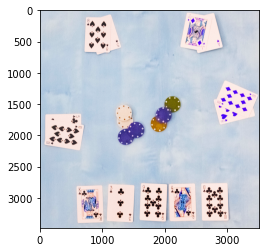

In [3]:
table_segmentation = segment_table("data/train/train_04.jpg")
plt.imshow(table_segmentation)

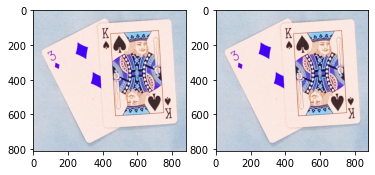

In [10]:
table_segmentation = segment_table("data/train/train_09.jpg")

# Pre process
kernel = np.ones((5,5),np.float32)/25
table_filtered = cv2.filter2D(table_segmentation,-1,kernel)
table_canny = cv2.Canny(table_filtered, 10, 200)

#T_cards = extract_T_cards(table_segmentation, table_canny)
right_cards = extract_right_cards(table_segmentation, table_canny)
left_cards = extract_left_cards(table_segmentation, table_canny)
top_cards = extract_top_cards(table_segmentation, table_canny)

fig, ax = plt.subplots(1,2)
for i in range(2):
    ax[i].imshow(right_cards[0])
    


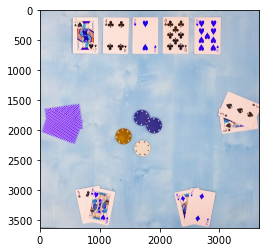

In [54]:
table_segmentation = segment_table("data/train/train_01.jpg")
table_rotated = cv2.rotate(table_segmentation, cv2.cv2.ROTATE_180)
plt.imshow(table_rotated)


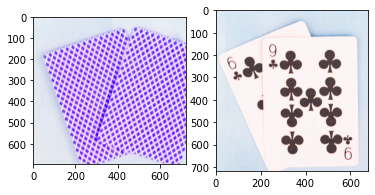

In [3]:
table_segmentation = segment_table("data/train/train_27.jpg")
table_rotated = cv2.rotate(table_segmentation, cv2.cv2.ROTATE_180)

# Attempt to remove some noise
kernel = np.ones((5,5),np.float32)/25
table_filtered = cv2.filter2D(table_segmentation,-1,kernel)
canny = cv2.Canny(table_filtered, 10, 200)

canny = cv2.rotate(canny, cv2.cv2.ROTATE_180)
sides = [canny[:,0:int(canny.shape[1]/2)], canny[:,int(canny.shape[1]/2):-1]]

# Params
bottom_boundary = 2625
T = 500
horizontal_buffer = 50
vertical_buffer = 50

cards = []
for idx, side in enumerate(sides):
    # Cut out bottom of image with supposed right-cards
    card_im = side[bottom_boundary:-1,250:1300]

    # Get card boundaries
    cards_horizontal_sum = np.sum(card_im, axis=0)
    left_boundary = np.min(np.where(cards_horizontal_sum > T)) - horizontal_buffer
    right_boundary = np.max(np.where(cards_horizontal_sum > T)) + horizontal_buffer
    if left_boundary < 0:
        left_boundary = 0
    if right_boundary > card_im.shape[1]:
        right_boundary = card_im.shape[1]

    # Exctract cards roughly
    cards_vertical_sum = np.sum(card_im, axis=1)
    upper_boundary = np.min(np.where(cards_vertical_sum > T)) - vertical_buffer
    lower_boundary = np.max(np.where(cards_vertical_sum > T)) + vertical_buffer
    if upper_boundary < 0:
        upper_boundary = 0
    if lower_boundary > card_im.shape[0]:
        lower_boundary = card_im.shape[0]
    
    if idx == 1:
        shift_x = int(canny.shape[1]/2)
        cards.append(table_rotated[upper_boundary + bottom_boundary:lower_boundary + bottom_boundary,left_boundary + shift_x + 250:right_boundary + shift_x + 250])
    else:
        cards.append(table_rotated[upper_boundary + bottom_boundary:lower_boundary + bottom_boundary,left_boundary + 250:right_boundary + 250])

fig, ax = plt.subplots(1,2)
for i in range(2):
    ax[i].imshow(cards[i])        

In [102]:
right_boundary

1876

array([  0,   0,   0, ..., 510,   0,   0], dtype=uint64)

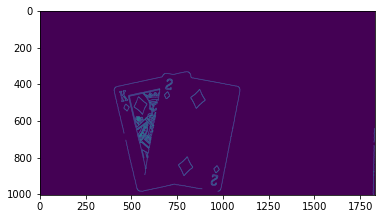

In [96]:
plt.imshow(card_im)
cards_horizontal_sum = np.sum(card_im, axis=0)
cards_horizontal_sum

In [83]:
cards_horizontal_sum = np.sum(card_im, axis=0)

np.min(np.where(cards_horizontal_sum > T)) - horizontal_buffer

-44

In [ ]:
# 01, 